In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [14]:
# Nos traemos la base de datos:
df = pd.read_csv('/content/drive/MyDrive/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [16]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [17]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [18]:

# Columnas categóricas a codificar
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'prefarea', 'furnishingstatus']

# Aplicar one-hot encoding solo a esas columnas
# Elimina una categoría por variable, las que se saben por defecto se eliminan

df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [19]:
# 2. Separar features y variable objetivo
X = df.drop('price', axis=1)
y = df['price']

In [20]:
# 3. Dividir en entrenamiento y prueba
'''
Fija la semilla del azar para que siempre obtengas los mismos resultados.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
'''
Ese código crea y entrena un modelo de Random Forest para regresión. 300 arboles
20 profundidad del arbol, evita overfitting.
semilla 42
'''


model = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=300, random_state=42)

In [22]:
len(X_test)

109

In [23]:
# 5. Predecir en el conjunto de prueba
y_predrf = model.predict(X_test)
y_predrf

array([ 5425793.33333333,  7140303.33333333,  3765190.13888889,
        4526923.33333333,  3661011.66666667,  3498180.        ,
        5144673.33333333,  5124490.        ,  2638743.33333333,
        2866690.16666667, 10039829.8       ,  3312128.05555556,
        3017301.38888889,  3447616.66666667,  3687792.5       ,
        4015806.66666667,  3261412.77777778,  4902835.        ,
        3647093.33333333,  4045498.33333333,  5549331.66666667,
        5874610.        ,  3030597.5       ,  3745396.66666667,
        4721313.33333333,  6581085.        ,  3223266.66666667,
        4624946.66666667,  6354226.66666667,  3257870.        ,
        5626145.        ,  3160570.        ,  6728936.66666667,
        4294523.33333333,  2999173.33333333,  6419303.33333333,
        4746933.33333333,  3676341.66666667,  3069080.        ,
        4200116.66666667,  4104333.33333333,  2824363.88888889,
        7260470.        ,  4192319.44444444,  3964636.66666667,
        4286263.33333333,  7275496.66666

In [24]:
# 6. Evaluar el modelo
mae = mean_absolute_error(y_test, y_predrf) #Error medio absoluto MAE,  MAE = 100 → en promedio, las predicciones se alejan 100 unidades del valor real.
mse = mean_squared_error(y_test, y_predrf) # MSE, Similar al MAE, pero eleva al cuadrado cada error.  MSE grande → hay errores muy grandes
rmse = np.sqrt(mse) # RMSE, Igual que MSE, pero devuelve la unidad original de y.  RMSE = 50 → los errores típicos son ~50 unidade
r2 = r2_score(y_test, y_predrf)

In [25]:
print(f"Evaluación del modelo:\n")
print(f"MAE:  {mae:.4f}") # Depende del tamaño de la muestra. cuando mas bajo, mejor
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}") # explica la variablidad. Superior al 80% se considera bueno. Perfecto sería el 100%

Evaluación del modelo:

MAE:  1010286.4466
MSE:  1935663688324.0981
RMSE: 1391281.3117
R²:   0.6170


Dado de esta forma, la información no es muy representativa:

In [26]:
# 7. Hacer una predicción de ejemplo
sample = X_test.iloc[:1]
predicted_price = model.predict(sample)
real_price = y_test.iloc[:1].values

print("\nPredicción para una muestra:")
print(f"Features: {sample.values}")
print(f"Precio predicho:  ${predicted_price[0]:.2f}")
print(f"Precio real:      ${real_price[0]:.2f}")



Predicción para una muestra:
Features: [[5900    4    2    2    1    0    0    1    0    0    0    0    1]]
Precio predicho:  $5425793.33
Precio real:      $4060000.00


In [27]:
sample

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
316,5900,4,2,2,1,0,0,1,0,0,0,0,1


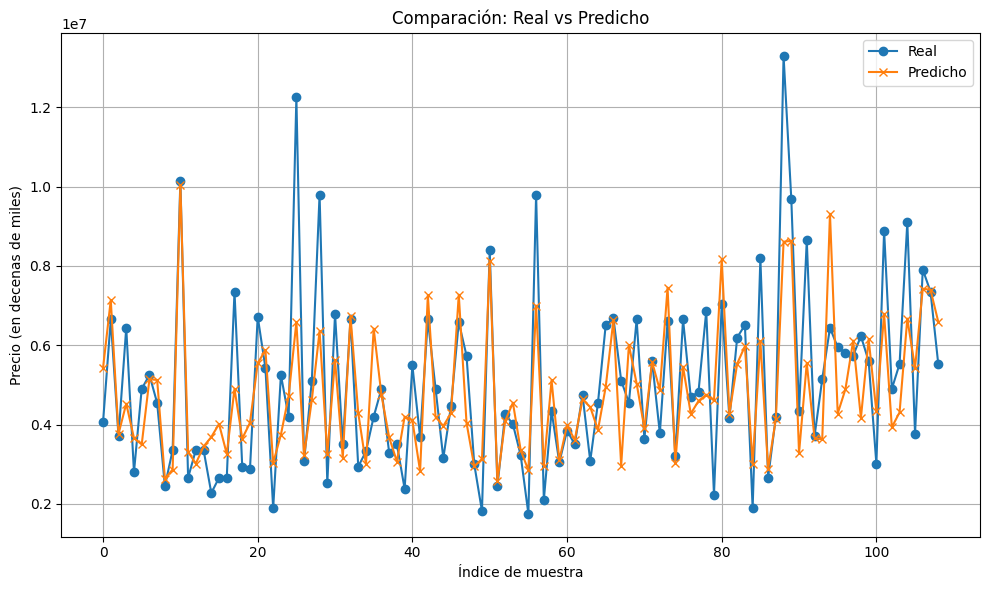

In [28]:

import matplotlib.pyplot as plt
import seaborn as sns


# 9. Gráfica: Índice vs Valor real y predicho
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real', marker='o')
plt.plot(y_predrf, label='Predicho', marker='x')
plt.xlabel("Índice de muestra")
plt.ylabel("Precio (en decenas de miles)")
plt.title("Comparación: Real vs Predicho")
plt.legend()
plt.grid(True) #lineas , cuadricula
plt.tight_layout() # ajusta margen
plt.show()

In [29]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [30]:
# Obtener importancia de las features
importances = model.feature_importances_
feature_names = X_train.columns

# Crear un DataFrame con los resultados de importancia
feat_imp_df = pd.DataFrame({'Feature': feature_names,'Importance': importances}).sort_values(by='Importance', ascending=False)
feat_imp_df

,Feature,Importance
0,area,0.470354
2,bathrooms,0.153213
9,airconditioning_yes,0.059157
4,parking,0.056842
3,stories,0.056252
1,bedrooms,0.047092
12,furnishingstatus_unfurnished,0.035982
7,basement_yes,0.032887
10,prefarea_yes,0.028771
8,hotwaterheating_yes,0.018503


/tmp/ipython-input-1584863793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')


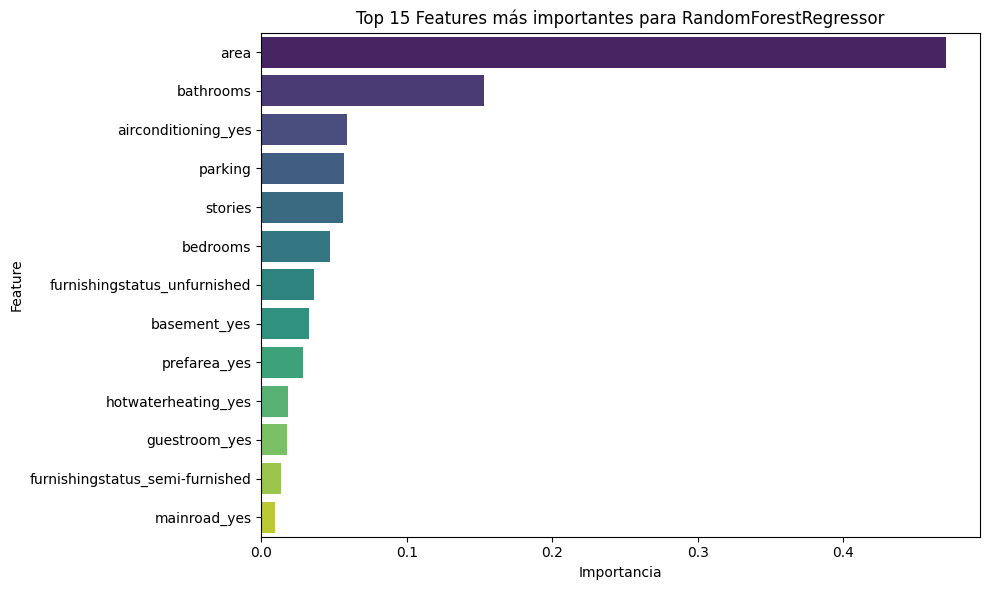

In [31]:
# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Features más importantes para RandomForestRegressor')
plt.xlabel('Importancia')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Realizar para el caso de Regresión Lineal

In [32]:
# Modelo de regresión lineal
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predicciones
y_predlr = model_lr.predict(X_test)

In [34]:
# 6. Evaluar el modelo
mae = mean_absolute_error(y_test, y_predlr) #Error medio absoluto MAE,  MAE = 100 → en promedio, las predicciones se alejan 100 unidades del valor real.
mse = mean_squared_error(y_test, y_predlr) # MSE, Similar al MAE, pero eleva al cuadrado cada error.  MSE grande → hay errores muy grandes
rmse = np.sqrt(mse) # RMSE, Igual que MSE, pero devuelve la unidad original de y.  RMSE = 50 → los errores típicos son ~50 unidade
r2 = r2_score(y_test, y_predlr)

In [37]:
print(f"Evaluación del modelo:\n")
print(f"MAE:  {mae:.4f}") # Depende del tamaño de la muestra. cuando mas bajo, mejor
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}") # explica la variablidad. Superior al 80% se considera bueno. Perfecto sería el 100%

Evaluación del modelo:

MAE:  970043.4039
MSE:  1754318687330.6638
RMSE: 1324506.9601
R²:   0.6529


In [38]:
# 7. Hacer una predicción de ejemplo
sample = X_test.iloc[:1]
predicted_price = model_lr.predict(sample)
real_price = y_test.iloc[:1].values

print("\nPredicción para una muestra:")
print(f"Features: {sample.values}")
print(f"Precio predicho:  ${predicted_price[0]:.2f}")
print(f"Precio real:      ${real_price[0]:.2f}")



Predicción para una muestra:
Features: [[5900    4    2    2    1    0    0    1    0    0    0    0    1]]
Precio predicho:  $5164653.90
Precio real:      $4060000.00


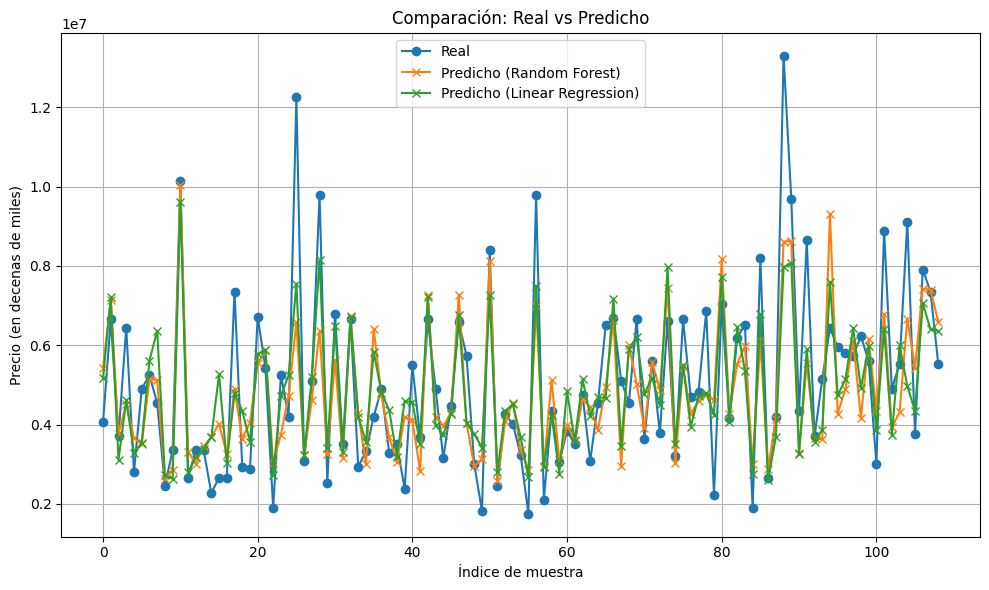

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# 9. Gráfica: Índice vs Valor real y predicho
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real', marker='o')
plt.plot(y_predrf, label='Predicho (Random Forest)', marker='x')
plt.plot(y_predlr, label='Predicho (Linear Regression)', marker='x')
plt.xlabel("Índice de muestra")
plt.ylabel("Precio (en decenas de miles)")
plt.title("Comparación: Real vs Predicho")
plt.legend()
plt.grid(True) #lineas , cuadricula
plt.tight_layout() # ajusta margen
plt.show()